Tarea M33-AD – ESTEFANIA ZAVALA

Utiliza el archivo de ventas de videojuegos  vgsales.csv, disponible en Kaggle, para realizar un análisis exploratorio de datos:

Con lo aprendido hasta el momento, generar un análisis completo de Exploratory Data Analysis (EDA) aplicado al archivo que contenga por lo menos 

- Lectura del archivo, head, tail, sample, describe.  Validación de columnas numéricas para que funcione con todas.  

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import matplotlib.pyplot as plt

In [2]:
#Lectura del archivo
os.chdir('C:/Users/estef/Desktop/data')
df = pd.read_csv('vgsales.csv')
#sample
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
350,351,Resident Evil 4,PS2,2005.0,Action,Capcom,2.08,0.83,0.46,0.25,3.62
10509,10511,Blitz: The League II,X360,2008.0,Sports,Midway Games,0.08,0.01,0.00,0.01,0.10
7094,7096,Super R-Type,SNES,1991.0,Shooter,Nintendo,0.00,0.00,0.23,0.00,0.23
6344,6346,NBA Jam 99,N64,1998.0,Sports,Acclaim Entertainment,0.25,0.02,0.00,0.00,0.27
10763,10765,Watchmen: The End is Nigh Part 1 & 2,X360,2009.0,Action,Warner Bros. Interactive Entertainment,0.09,0.00,0.00,0.01,0.10


In [3]:
#head
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#tail
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
#Validación de columnas numéricas
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
#Verificar datos null
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#Ajustar tipo de dato de columna 'Year' / Eliminar datos Nan
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype('int64')
df[df['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [8]:
#Verificar corrección de datos 'Year'
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
#Describe
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
#Comprobar que se hayan eliminado las filas donde Year era igual a Nan
df[df['Name']=='Space Invaders']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4293,4295,Space Invaders,SNES,1994,Shooter,Taito,0.00,0.00,0.46,0.0,0.46
8587,8589,Space Invaders,N64,1999,Shooter,Activision,0.13,0.03,0.00,0.0,0.16
10390,10392,Space Invaders,GBA,2002,Shooter,Activision,0.08,0.03,0.00,0.0,0.11


- Totales

1) Total de videojuegos analizados

In [11]:
df['Name'].unique().__len__()

11360

2) total de géneros analizados

In [12]:
df['Genre'].unique().__len__()

12

3) Plataformas analizadas

In [13]:
df['Platform'].unique().__len__()

31

- Ventas

1) Total de ventas por año

In [14]:
#df[df['Year'] == 1983]['Global_Sales'].sum()
#Comprobar venta de X año
def venta_año(año):
    venta = df[df['Year'] == año]['Global_Sales'].sum()
    print(f'La venta total en {año} fue de {venta}')

venta_año(1983)

La venta total en 1983 fue de 16.790000000000003


In [15]:
#Total de ventas en cada año
ventas_por_año = df.groupby('Year')['Global_Sales'].sum().rename('Total_Sale').reset_index()
ventas_por_año

,Year,Total_Sale
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [16]:
px.bar(ventas_por_año,x='Year',y='Total_Sale')

En el gráfico anterior se puede apreciar el aumento en la venta de videojuegos hasta el año 2008, despues de este año se presenta una disminución, sería interesante investigar factores que causaran el decrecimiento en las ventas. 
Se podría considerar que fue debido a la crisis de ese año pero al parecer las ventas no han vuelto a aumentar a pesar del paso de los años.
Podría deberse tambien a que los datos a partir del año 2015 o 2016 no se encuentren del todo actualizados.
Otro factor que pudo haber influido es la creación de suscripciones que te permiten acceder a diferentes juegos sin necesidad de comprarlos.

In [17]:
#Venta total
print(f'La venta total del Df es de {df["Global_Sales"].sum()}')

La venta total del Df es de 8820.36


In [18]:
#Venta spor región 
Venta_por_región = df.agg({ 'NA_Sales': 'sum','EU_Sales': 'sum','JP_Sales': 'sum','Other_Sales': 'sum'})
Venta_por_región

NA_Sales       4333.43
EU_Sales       2409.12
JP_Sales       1284.30
Other_Sales     789.01
dtype: float64

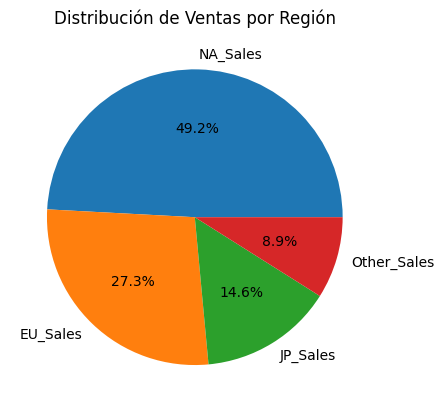

In [19]:
Venta_por_región.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Ventas por Región')
plt.show()

In [20]:
#Venta spor plataforma 
Venta_por_plataforma = df.groupby(['Platform'])[[ 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Venta_por_plataforma

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,80.78,4.86,0.00,0.84
3DO,0.00,0.00,0.10,0.00
3DS,78.03,58.30,97.30,12.55
DC,5.43,1.69,8.56,0.27
DS,388.56,194.07,175.02,60.29
GB,113.64,47.51,85.12,8.16
GBA,184.12,74.59,46.56,7.61
GC,131.94,38.32,21.34,5.13
GEN,19.27,5.52,2.67,0.89


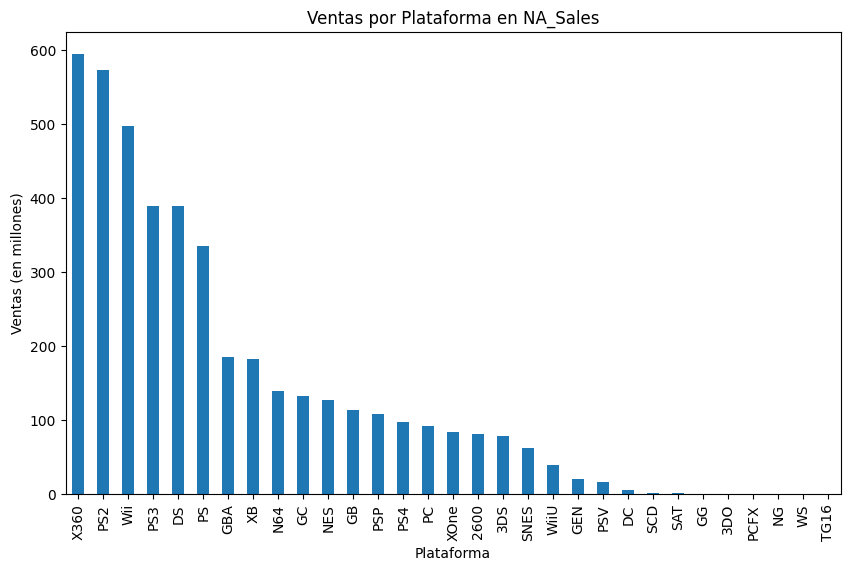

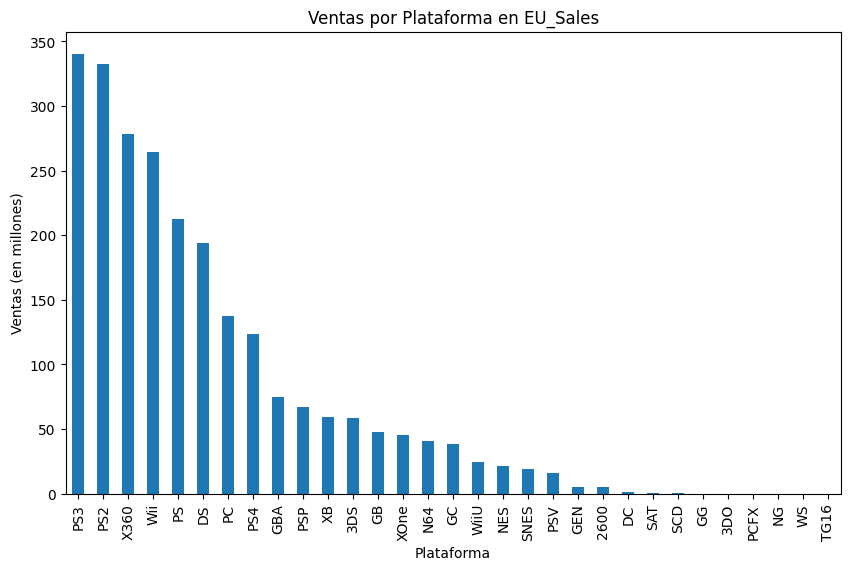

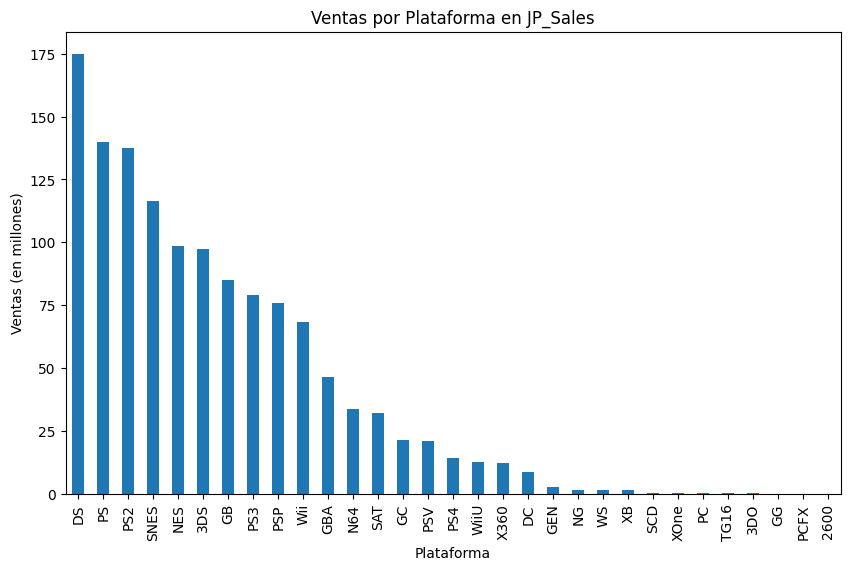

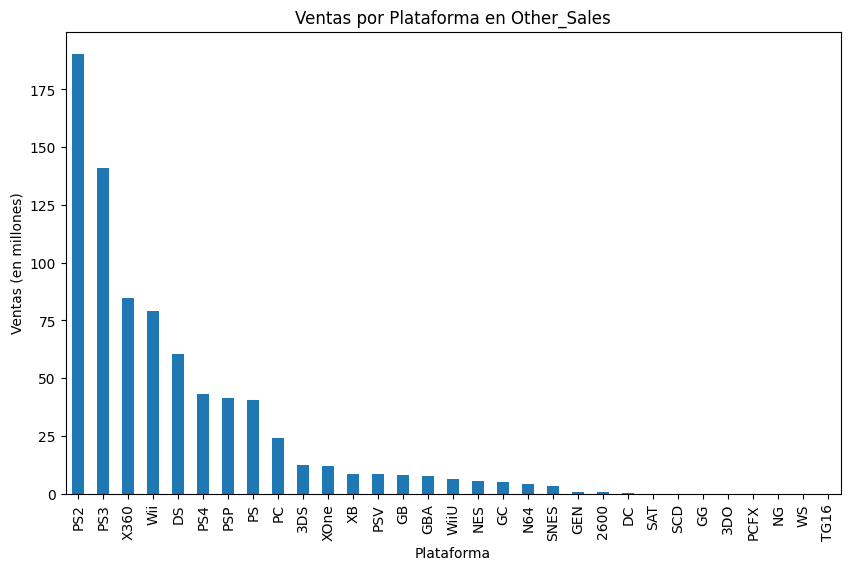

In [21]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for region in regions:
    Venta_por_plataforma[region].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
    plt.title(f'Ventas por Plataforma en {region}')
    plt.ylabel('Ventas (en millones)')
    plt.xlabel('Plataforma')
    plt.show()

2) Juegos más vendidos por año

In [22]:
#Años presentes den el DF
print(df['Year'].unique().__len__())
print(df['Year'].sort_values().unique())

39
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2020]


In [23]:
#Juegos más vendidos en X año
df[df['Year'] ==2020 ].sort_values('Global_Sales',ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [24]:
#Ventas de cada juego
df.groupby('Name')['Global_Sales'].sum().rename('Global_Sale').reset_index().sort_values(by='Global_Sale')

,Name,Global_Sale
3042,Fatal Fury: Battle Archives Volume 1 (JP sales),0.01
7920,Rock N' Roll Racing,0.01
32,15 Days,0.01
11353,th!nk Logic Trainer,0.01
5864,Mini Desktop Racing,0.01
...,...,...
5508,Mario Kart Wii,35.82
9611,Tetris,35.84
9229,Super Mario Bros.,45.31
3664,Grand Theft Auto V,55.92


In [25]:
#Juego más vendido en cada año
df_top_sales = df.loc[df.groupby('Year')['Global_Sales'].idxmax(), ['Year', 'Name', 'Platform','Global_Sales']].reset_index(drop=True)
df_top_sales

,Year,Name,Platform,Global_Sales
0,1980,Asteroids,2600,4.31
1,1981,Pitfall!,2600,4.50
2,1982,Pac-Man,2600,7.81
3,1983,Baseball,NES,3.20
4,1984,Duck Hunt,NES,28.31
5,1985,Super Mario Bros.,NES,40.24
6,1986,The Legend of Zelda,NES,6.51
7,1987,Zelda II: The Adventure of Link,NES,4.38
8,1988,Super Mario Bros. 3,NES,17.28
9,1989,Tetris,GB,30.26


3) Plataformas con más ingresos por año. 
Todos estos números desglosados por ingreso:
NA, EU, JP, Otros y el Global,

In [26]:
#Ventas de cada plataforma
ventas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum().rename('Global_Sale').reset_index().sort_values(by='Global_Sale')
ventas_por_plataforma

,Platform,Global_Sale
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.87
3,DC,15.97
8,GEN,28.36
21,SAT,33.59


In [27]:
px.bar(ventas_por_plataforma,x='Platform',y='Global_Sale')

In [28]:
#Plataforma con más ventas por año
platform_top_sales = df.groupby(['Year', 'Platform']).agg({'Global_Sales': 'sum', 'EU_Sales': 'sum','JP_Sales': 'sum','Other_Sales': 'sum'})
platform_top_sales = platform_top_sales.loc[platform_top_sales.groupby('Year')['Global_Sales'].idxmax()].reset_index()
platform_top_sales

,Year,Platform,Global_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,2600,11.38,0.67,0.00,0.12
1,1981,2600,35.77,1.96,0.00,0.32
2,1982,2600,28.86,1.65,0.00,0.31
3,1983,NES,10.96,0.46,8.10,0.08
4,1984,NES,50.09,2.09,14.27,0.70
5,1985,NES,53.44,4.68,14.54,0.91
6,1986,NES,36.41,2.80,19.81,1.93
7,1987,NES,19.76,1.32,11.63,0.19
8,1988,NES,45.01,6.30,15.41,0.94
9,1989,GB,64.98,7.60,16.16,1.40


- Crecimiento

1) qué género ha tenido el mayor y menor crecimiento

In [29]:
#Géneros en el DF
print(df['Genre'].unique().__len__())
print(df['Genre'].sort_values().unique())

12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [30]:
#Ventas de cada género por año
genre_sales = pd.pivot_table(df,values='Global_Sales',index='Year',columns='Genre',aggfunc=sum)
genre_sales

C:\Users\estef\AppData\Local\Temp\ipykernel_16052\1839275635.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.71,NaN,NaN,NaN,NaN,7.07,NaN,0.49,NaN
1981,14.84,NaN,NaN,NaN,6.93,2.24,0.48,NaN,10.04,0.45,0.79,NaN
1982,6.52,NaN,NaN,0.87,5.03,10.03,1.57,NaN,3.79,NaN,1.05,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.48,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.18,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.03,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.57,NaN
1987,1.12,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.71,NaN,3.72,NaN
1988,1.75,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


<Axes: xlabel='Year'>

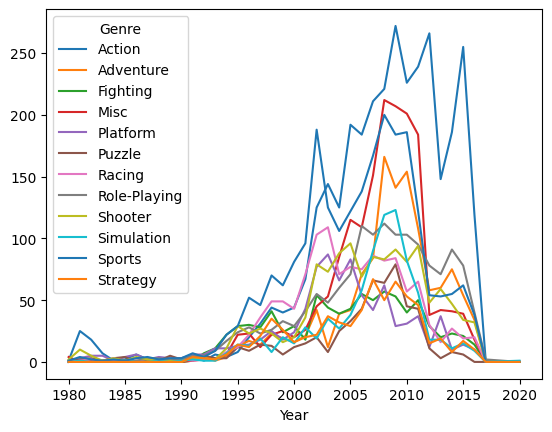

In [31]:
pd.crosstab(df['Year'],df['Genre']).plot()

In [32]:
#Porcentaje de crecimiento o decrecimiento en las ventas de cada género año con año
genre_salespct = genre_sales[list(genre_sales.columns)].pct_change()
genre_salespct

C:\Users\estef\AppData\Local\Temp\ipykernel_16052\2431226289.py:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,42.647059,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.420085,NaN,0.612245,NaN
1982,-0.560647,NaN,0.000000,-0.678967,-0.274170,3.477679,2.270833,NaN,-0.622510,0.000000,0.329114,NaN
1983,-0.561350,NaN,0.000000,1.459770,0.377734,-0.922233,0.000000,NaN,-0.873351,0.000000,2.047619,NaN
1984,-0.353147,0.000000,0.000000,-0.322430,-0.900433,3.025641,2.789809,NaN,63.791667,0.000000,0.931250,NaN
1985,0.902703,0.000000,0.363636,0.000000,61.565217,0.022293,0.000000,NaN,-0.967846,-0.933333,-0.682848,NaN
1986,2.903409,0.000000,0.000000,0.000000,-0.782488,0.000000,-0.670588,NaN,2.890000,0.000000,1.841837,NaN
1987,-0.918486,9.950000,4.161905,0.000000,-0.814696,0.000000,0.000000,0.845238,-0.817481,0.000000,-0.332136,NaN
1988,0.562500,0.000000,0.000000,0.000000,14.936782,0.738318,0.091837,0.264516,-0.281690,0.000000,-0.032258,NaN


In [33]:
#Promedio en el porcentaje de crecimiento o decrecimiento de cada genero en la historia
genre_salespct.mean().sort_values()

Genre
Role-Playing    0.171005
Strategy        0.221901
Sports          0.250128
Puzzle          0.431492
Racing          0.606351
Fighting        1.151434
Action          1.367892
Simulation      1.545621
Misc            1.861795
Platform        2.028314
Adventure       2.118918
Shooter         2.145119
dtype: float64

In [34]:
Venta_por_genero = df.groupby(['Genre'])[ 'Global_Sales'].sum().rename('Global_Sales').reset_index()
Venta_por_genero

,Genre,Global_Sales
0,Action,1722.88
1,Adventure,234.80
2,Fighting,444.05
3,Misc,797.62
4,Platform,829.15
5,Puzzle,242.22
6,Racing,726.77
7,Role-Playing,923.84
8,Shooter,1026.20
9,Simulation,390.16


In [35]:
px.pie(Venta_por_genero,names='Genre',values='Global_Sales')

2) qué plataforma ha tenido el mayor y menor crecimiento

In [36]:
#Plataformas en el DF
print(df['Platform'].unique().__len__())
print(df['Platform'].sort_values().unique())

31
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [37]:
#Ventas de cada plataforma por año
Platform_sales = pd.pivot_table(df,values='Global_Sales',index='Year',columns='Platform',aggfunc=sum)
Platform_sales

C:\Users\estef\AppData\Local\Temp\ipykernel_16052\56251102.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.75,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Porcentaje de crecimiento o decrecimiento en las ventas de cada plataforma año con año
Platform_salespct = Platform_sales[list(Platform_sales.columns)].pct_change()
Platform_salespct

C:\Users\estef\AppData\Local\Temp\ipykernel_16052\226677118.py:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,2.143234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,-0.193179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,-0.797990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,-0.953688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.466667,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,-0.621212,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Promedio en el porcentaje de crecimiento o decrecimiento de cada plataforma en la historia
Platform_salespct.mean().sort_values()

Platform
Wii     -0.237079
3DS     -0.206755
WiiU    -0.136096
N64     -0.077777
GC      -0.063962
SNES    -0.049176
DC      -0.039885
SCD     -0.030133
WS      -0.005788
GG       0.000000
TG16     0.000000
PCFX     0.000000
PS2      0.009398
SAT      0.013066
PSV      0.058697
NG       0.061002
2600     0.066767
NES      0.082413
PS3      0.093178
3DO      0.125000
PSP      0.142582
PS       0.194511
XOne     0.226621
PS4      0.299470
X360     0.312707
GEN      0.468377
XB       1.127849
GB       1.893621
PC       3.196867
DS      26.928186
GBA     56.921075
dtype: float64

In [40]:
#Plataformas con mayor crecimiento
Platform_salespct.mean().sort_values().tail()

Platform
XB      1.127849
GB      1.893621
PC      3.196867
DS     26.928186
GBA    56.921075
dtype: float64

3) qué videojuego ha tenido el mayor y menor crecimiento

In [41]:
#Juegos en el DF
print(df['Name'].unique().__len__())
print(df['Name'].sort_values().unique())

11360
["'98 Koshien" '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 ... 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']


In [42]:
#Ventas de cada juego por año
name_sales = pd.pivot_table(df,values='Global_Sales',index='Year',columns='Name',aggfunc=sum)
name_sales

C:\Users\estef\AppData\Local\Temp\ipykernel_16052\135134121.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Name,'98 Koshien,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol.2//Reminisce,.hack//G.U. Vol.2//Reminisce (jp sales),.hack//G.U. Vol.3//Redemption,.hack//Infection Part 1,.hack//Link,.hack//Mutation Part 2,.hack//Outbreak Part 3,.hack//Quarantine Part 4: The Final Chapter,...,inFAMOUS: Second Son,nail'd,pro evolution soccer 2011,th!nk Logic Trainer,thinkSMART,thinkSMART FAMILY!,thinkSMART: Chess for Kids,uDraw Studio,uDraw Studio: Instant Artist,¡Shin Chan Flipa en colores!
Year,,,,,,,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Porcentaje de crecimiento o decrecimiento en las ventas de cada juego año con año
name_salespct = name_sales[list(name_sales.columns)].pct_change()
name_salespct

C:\Users\estef\AppData\Local\Temp\ipykernel_16052\4067933106.py:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Name,'98 Koshien,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol.2//Reminisce,.hack//G.U. Vol.2//Reminisce (jp sales),.hack//G.U. Vol.3//Redemption,.hack//Infection Part 1,.hack//Link,.hack//Mutation Part 2,.hack//Outbreak Part 3,.hack//Quarantine Part 4: The Final Chapter,...,inFAMOUS: Second Son,nail'd,pro evolution soccer 2011,th!nk Logic Trainer,thinkSMART,thinkSMART FAMILY!,thinkSMART: Chess for Kids,uDraw Studio,uDraw Studio: Instant Artist,¡Shin Chan Flipa en colores!
Year,,,,,,,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Promedio en el porcentaje de crecimiento o decrecimiento de cada juego en la historia
name_salespct.mean().sort_values()

Name
Need for Speed (2015)             -0.330076
Rise of the Tomb Raider           -0.313725
Grand Theft Auto V                -0.297026
The Book of Unwritten Tales 2     -0.285714
Arslan: The Warriors of Legend    -0.282051
                                    ...    
Divinity: Original Sin             4.000000
The Sims                           4.033333
Deal or No Deal                   14.147173
Mortal Kombat                     18.967576
Imagine: Makeup Artist                  NaN
Length: 11360, dtype: float64

In [45]:
df_lastYears = df[df['Year'] >= 2015]
sales_by_genre = df_lastYears.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
sales_by_genre

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,28.70,31.01,21.65
Adventure,3.10,3.77,2.01
Fighting,5.20,3.53,1.43
Misc,5.03,3.80,2.91
Platform,3.29,2.68,1.40
Puzzle,0.05,0.11,0.52
Racing,2.30,5.88,0.29
Role-Playing,14.74,13.81,10.38
Shooter,38.23,31.93,3.30


<Axes: xlabel='Genre'>

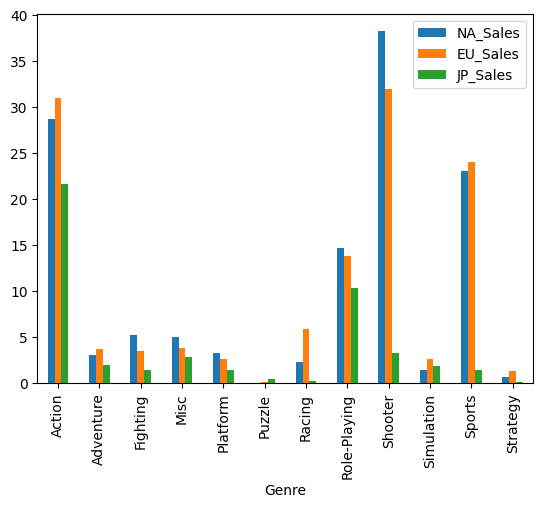

In [46]:
sales_by_genre.plot(kind='bar')

In [47]:
sales_by_platform = df_lastYears.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
sales_by_platform

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
3DS,6.65,5.34,20.42
DS,0.27,0.00,0.00
PC,3.04,6.87,0.00
PS3,5.16,8.23,4.80
PS4,52.62,67.91,10.45
PSP,0.00,0.00,0.12
PSV,0.73,1.58,7.54
Wii,0.57,0.87,0.00
WiiU,8.26,5.89,3.96


<Axes: xlabel='Platform'>

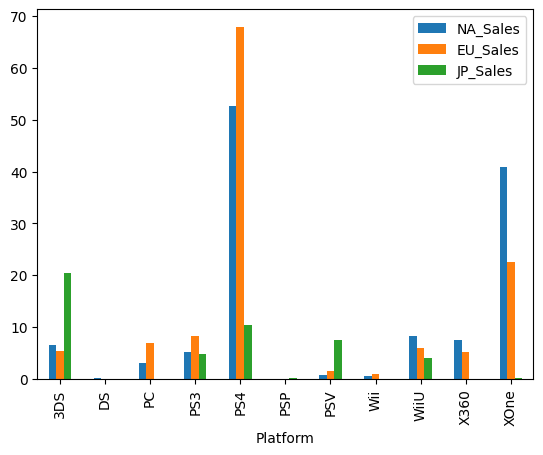

In [48]:
sales_by_platform.plot(kind='bar')